<a href="https://colab.research.google.com/github/ram-elgov/Statistics-For-CS/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from scipy.stats import norm

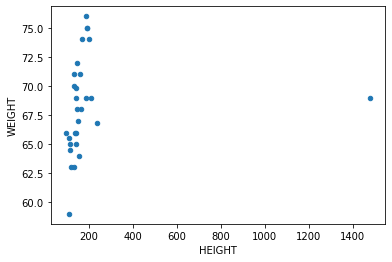

In [ ]:
df = pd.read_csv("heights.csv")
df.plot.scatter("HEIGHT", "WEIGHT")

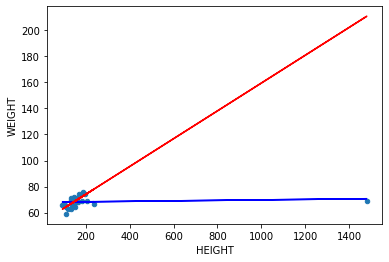

In [ ]:
df.plot.scatter("HEIGHT", "WEIGHT")

heights, weights = df["HEIGHT"].values, df["WEIGHT"].values
heights_2d = heights.reshape(-1, 1)

# Least squares line (blue)
reg = LinearRegression()
reg.fit(heights_2d, weights)
predicted_weights_rss = reg.predict(heights_2d)
plt.plot(heights, predicted_weights_rss, color="blue")


# Resistant line (red)
x_h, x_l = np.quantile(heights, 5/6), np.quantile(heights, 1/6)
y_h, y_l = np.quantile(weights, 5/6), np.quantile(weights, 1/6)
slope_rl = (y_h - y_l) / (x_h - x_l)
a_rl = np.median([weight - slope_rl * height for weight, height in df.values])
predicted_weights_rl = [a_rl + slope_rl * height for height in heights]
plt.plot(heights, predicted_weights_rl, color="red")

In [ ]:
print(f"RSS line slope: {reg.coef_[0]:.3f}")
print(f"RSS score: {reg.score(heights_2d, weights):.3f}")
print(f"Pearson score: {np.corrcoef(heights, weights)[0][1]:.3f}")

RSS line slope: 0.002
RSS score: 0.012
Pearson score: 0.112


Now we will remove the exceptional observation.

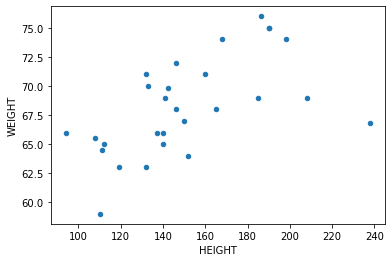

In [ ]:
df = df[df["HEIGHT"] < 1000]
df.plot.scatter("HEIGHT", "WEIGHT")

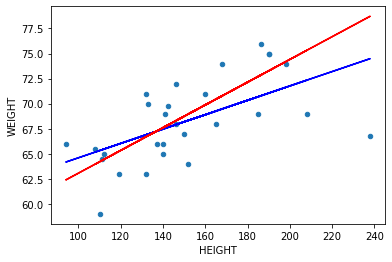

In [ ]:
df.plot.scatter("HEIGHT", "WEIGHT")

heights, weights = df["HEIGHT"].values, df["WEIGHT"].values
heights_2d = heights.reshape(-1, 1)

# Least squares line (blue)
reg = LinearRegression()
reg.fit(heights_2d, weights)
predicted_weights_rss = reg.predict(heights_2d)
plt.plot(heights, predicted_weights_rss, color="blue")

# Resistant line (red)
x_h, x_l = np.quantile(heights, 5/6), np.quantile(heights, 1/6)
y_h, y_l = np.quantile(weights, 5/6), np.quantile(weights, 1/6)
slope_rl = (y_h - y_l) / (x_h - x_l)
a_rl = np.median([weight - slope_rl * height for weight, height in df.values])
predicted_weights_rl = [a_rl + slope_rl * height for height in heights]
plt.plot(heights, predicted_weights_rl, color="red")

In [ ]:
print(f"RSS line slope: {reg.coef_[0]:.3f}")
print(f"RSS score: {reg.score(heights_2d, weights):.3f}")
print(f"Pearson score: {np.corrcoef(heights, weights)[0][1]:.3f}")

RSS line slope: 0.072
RSS score: 0.343
Pearson score: 0.586


# Problem 2

In [ ]:
norm_rv = norm(loc=5.0, scale=1.0)
X = norm_rv.rvs(30)
Y = 5 * X + 2

In [ ]:
print(f"Pearson score: {np.corrcoef(X, Y)[0][1]}")

Pearson score: 1.0


In [ ]:
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), Y)
print(f"The slope is: {reg.coef_[0]}")

The slope is: 5.0


In [ ]:
noise = norm.rvs(loc=0, scale=1, size=30)
Y = Y + noise

reg = LinearRegression()
reg.fit(X.reshape(-1, 1), Y)

print(f"Pearson score (noisy vector): {np.corrcoef(X, Y)[0][1]}")
print(f"The slope is (noisy vector): {reg.coef_[0]}")

Pearson score (noisy vector): 0.9471763624985441
The slope is (noisy vector): 4.90311629532539


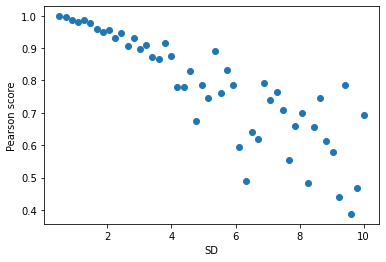

In [ ]:
X = norm_rv.rvs(30)

scales_vec = np.linspace(start=0.5, stop=10, num=50)
slopes, pearson_scores = [], []

for scale in scales_vec:
  Y = 5 * X + 2 + norm.rvs(loc=0, scale=scale, size=30)

  reg = LinearRegression()
  reg.fit(X.reshape(-1, 1), Y)
  slopes.append(reg.coef_[0])
  pearson_scores.append(np.corrcoef(X, Y)[0][1])

plt.xlabel("SD")
plt.ylabel("Pearson score")
plt.scatter(scales_vec, pearson_scores)

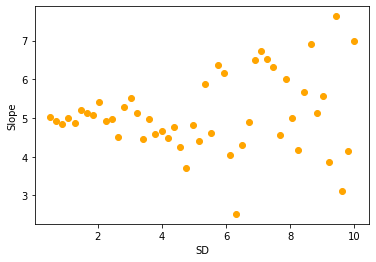

In [ ]:
plt.xlabel("SD")
plt.ylabel("Slope")
plt.scatter(scales_vec, slopes, color="orange")